### Web Scraping a Pagina de Clima de la CDMX

https://github.com/fitomx19

In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt  
import numpy as np
#Obtenemos el Url de la pagina que vamos a hacer scrapping
url = "https://weather.com/es-MX/tiempo/10dias/l/Cuauht%C3%A9moc?canonicalCityId=be0befa047d3e1dee37c318f892246bcba0860bde3bbe17767ebcc35ee1d2d72"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

Despues vamos a buscar en el atributo < details > todos los que tengan por clase "DaypartDetails..."

In [2]:
tabla_de_temperaturas = soup.find_all('details', 'DaypartDetails--DayPartDetail--1up3g Disclosure--themeList--25Q0H')


Vamos a utilizar dos metodos para almacenar informacion, uno en diccionarios y otro en listas, asi como la impresion una mediante tablas de barras y otro por scatter

In [3]:
#Listas
text_temperatura = []
text_dia = []
#Diccionario
Diccionario = {}

#Creacion de lista - primera forma para desarrollarlo
for x in tabla_de_temperaturas:
    #Buscamos en la seccion de codigo todos los spans con ese nombre de atributo
    temperatura = x.find('span', {'data-testid': 'TemperatureValue'})
    #Buscamos en la seccion de codigo todos los h3 con ese nombbre de atributo
    dia = x.find('h3', {'data-testid': 'daypartName'})
    #Apilamos en la lista correspondiente ya sea text temperatura o text dia
    text_temperatura.append(int(temperatura.get_text().replace("°", " ")))
    text_dia.append(dia.get_text())

#creacion de diccionario - segunda forma para desarrollarlo

#

for x in tabla_de_temperaturas:
    #Al igual que arriba obtenemos los valores por atributos
    temperatura = x.find('span', {'data-testid': 'TemperatureValue'})
    dia = x.find('h3', {'data-testid': 'daypartName'})
    #Finalmente insertamos en los diccionarios, no olvidando convertir la temperatura a int y quitando el ° y reemplazando
    #por un espacio en blanco
    Diccionario.update({dia.get_text() : int(temperatura.get_text().replace("°", " ")) })

Imprimimos la tabla para mostrar la grafica de las temperaturas mediante scatter

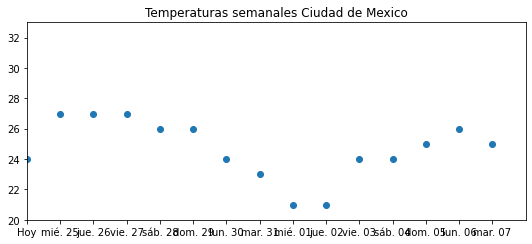

In [7]:
#Creamos arreglos nuMPY
txtT = np.array(text_temperatura)
txtD = np.array(text_dia)

#Ajustamos los parametros para acomodarlo de una manera más correcta
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
#Marcamos que datos queremos imprimir
plt.scatter(txtD, txtT)
spacing = .700
#Ajustamos los rangos
plt.axis([0, 15, 20, 33])
fig.subplots_adjust(bottom=spacing)
plt.title("Temperaturas semanales Ciudad de Mexico")
plt.show()

Imprimimos la tabla con el diccionario mediante grafica de barras

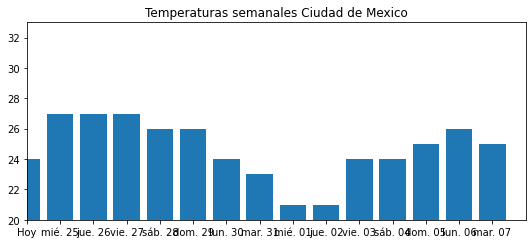

In [8]:
#Agregamos los datos recordando utilizar los values  como rango y y la longitud del diccionario como x
plt.bar(range(len(Diccionario)), list(Diccionario.values()), align='center')
#Aca convertimos el range (1,2,3,4...) de los dias a el nombre de la impresion como lo es Hoy Lunes, Martes...
plt.xticks(range(len(Diccionario)), list(Diccionario.keys()))
#Ajustamos el tamaño
plt.axis([0, 15, 20, 33])
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Temperaturas semanales Ciudad de Mexico")
#Imprimos la tabla
plt.show()

